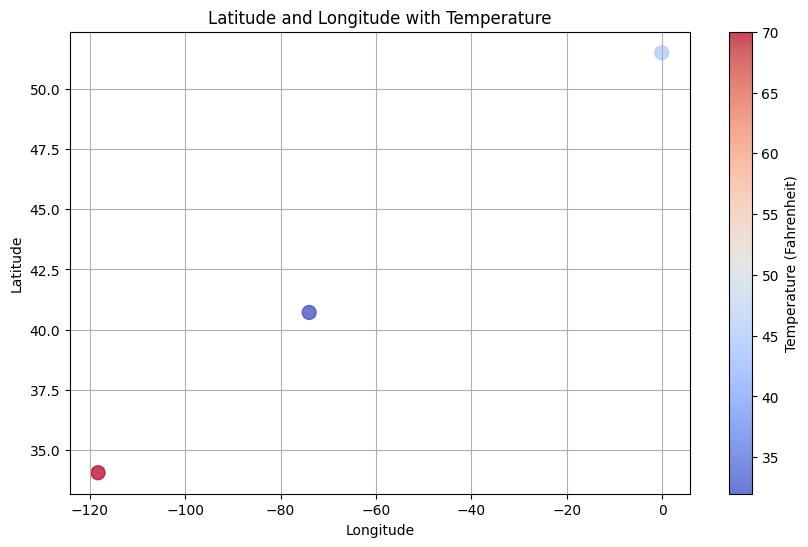

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: latitude, longitude, and temperature
latitude = [40.7128, 34.0522, 51.5074]  # Example latitude coordinates (e.g., New York, Los Angeles, London)
longitude = [-74.0060, -118.2437, -0.1276]  # Example longitude coordinates
temperature = [32, 70, 45]  # Example temperature data (in Fahrenheit)

# Plotting latitude and longitude with temperature as the color
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=temperature, s=100, cmap='coolwarm', alpha=0.75)

# Adding colorbar and labels
cbar = plt.colorbar()
cbar.set_label('Temperature (Fahrenheit)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude with Temperature')

# Display the plot
plt.grid(True)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

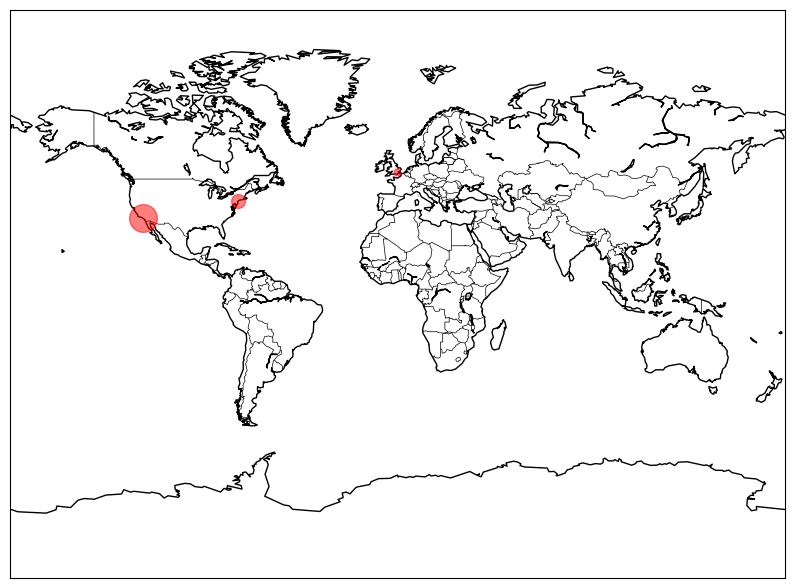

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure and axis
plt.figure(figsize=(10, 8))

# Define the map boundaries
map = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
              llcrnrlon=-180,urcrnrlon=180,resolution='c')

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Define some cities with their latitude, longitude, and temperature
cities = {
    'New York': (40.7128, -74.0060, 10),  # Example temperature: 10°C
    'Los Angeles': (34.0522, -118.2437, 20),  # Example temperature: 20°C
    'London': (51.5074, -0.1278, 5),  # Example temperature: 5°C
    # Add more cities as needed
}

# Plot cities on the map with temperature-based color coding
for city, (lat, lon, temp) in cities.items():
    x, y = map(lon, lat)
    map.plot(x, y, 'ro', markersize=temp, alpha=0.5)  # Adjust size based on temperature

# Add a colorbar legend
plt.colorbar(label='Temperature (°C)')

# Add a title
plt.title('Temperature Distribution in Selected Cities')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

class SpatialGrid:
    def __init__(self, min_lat, max_lat, min_lon, max_lon, cell_size):
        self.min_lat = min_lat
        self.max_lat = max_lat
        self.min_lon = min_lon
        self.max_lon = max_lon
        self.cell_size = cell_size
        self.num_lat_cells = int((max_lat - min_lat) / cell_size)
        self.num_lon_cells = int((max_lon - min_lon) / cell_size)
        self.grid = [[[] for _ in range(self.num_lon_cells)] for _ in range(self.num_lat_cells)]

    def add_location(self, latitude, longitude, obj):
        lat_index = int((latitude - self.min_lat) / self.cell_size)
        lon_index = int((longitude - self.min_lon) / self.cell_size)
        if 0 <= lat_index < self.num_lat_cells and 0 <= lon_index < self.num_lon_cells:
            self.grid[lat_index][lon_index].append(obj)

    def plot_grid(self):
        # Create a basemap
        m = Basemap(llcrnrlon=self.min_lon, llcrnrlat=self.min_lat, urcrnrlon=self.max_lon, urcrnrlat=self.max_lat,
                    projection='mill', resolution='h')

        # Draw parallels and meridians.
        m.drawparallels(range(int(self.min_lat), int(self.max_lat) + 1, 1), labels=[1, 0, 0, 0], fontsize=10)
        m.drawmeridians(range(int(self.min_lon), int(self.max_lon) + 1, 1), labels=[0, 0, 0, 1], fontsize=10)

        # Plot grid lines
        for lat_index in range(self.num_lat_cells + 1):
            lat = self.min_lat + lat_index * self.cell_size
            lon1, lon2 = self.min_lon, self.max_lon
            x, y = m([lon1, lon2], [lat, lat])
            m.plot(x, y, marker=None, color='black')

        for lon_index in range(self.num_lon_cells + 1):
            lon = self.min_lon + lon_index * self.cell_size
            lat1, lat2 = self.min_lat, self.max_lat
            x, y = m([lon, lon], [lat1, lat2])
            m.plot(x, y, marker=None, color='black')

        plt.title('Spatial Grid')
        plt.show()


# Example usage:
if __name__ == "__main__":
    # Define the bounding box of the map
    min_lat = 40.0
    max_lat = 42.0
    min_lon = -75.0
    max_lon = -72.0
    cell_size = 0.1  # Degrees

    # Create a spatial grid
    grid = SpatialGrid(min_lat, max_lat, min_lon, max_lon, cell_size)

    # Plot the grid
    grid.plot_grid()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the boundaries of Canada
llon, ulon = -140, -52
llat, ulat = 41, 83

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=llat, urcrnrlat=ulat, llcrnrlon=llon, urcrnrlon=ulon, resolution='i')

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw parallels and meridians
parallels = np.arange(40., 90., 1.)
m.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)

meridians = np.arange(-140., -50., 1.)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)

# Draw grid lines
grid_interval = 1  # 1x1 km grid
lon_lines = np.arange(llon, ulon, grid_interval)
lat_lines = np.arange(llat, ulat, grid_interval)

for lon in lon_lines:
    x, y = m([lon, lon], [llat, ulat])
    m.plot(x, y, color='black', linestyle='solid', linewidth=0.5)

for lat in lat_lines:
    x, y = m([llon, ulon], [lat, lat])
    m.plot(x, y, color='black', linestyle='solid', linewidth=0.5)

# Display the plot
plt.title('1x1 km Grid on Canada Map')
plt.show()


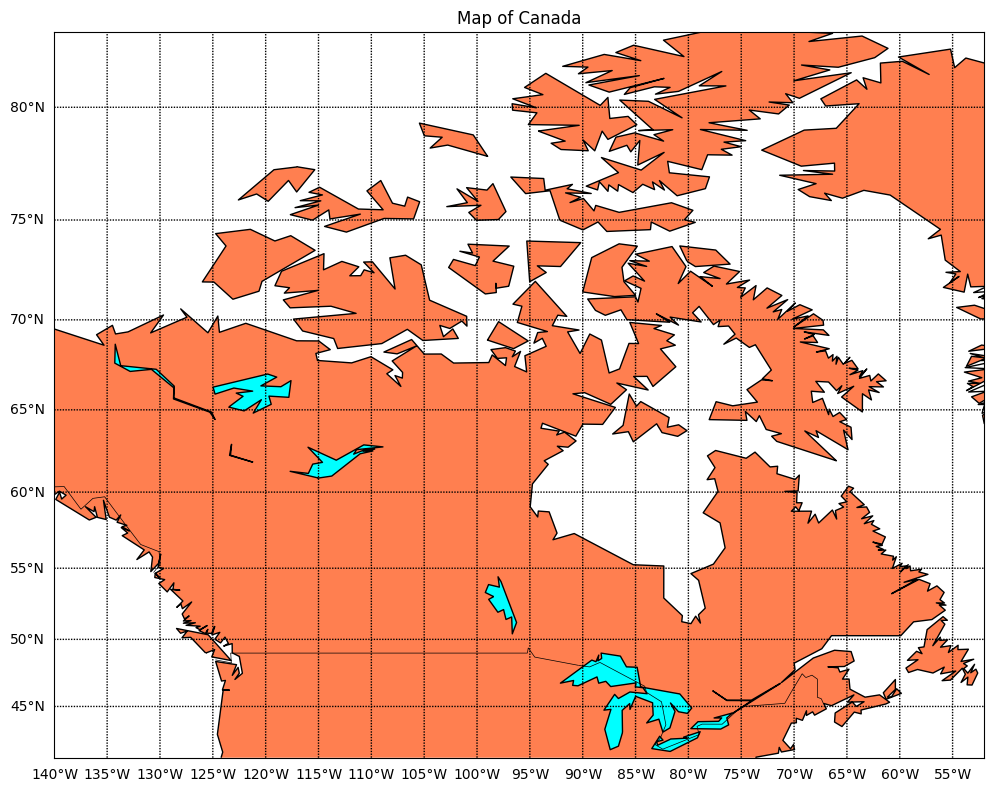

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Increase the size of the plot
plt.figure(figsize=(12, 10))

# Create a Basemap instance for Canada
m = Basemap(projection='mill', llcrnrlat=41, urcrnrlat=83, llcrnrlon=-140, urcrnrlon=-52, resolution='c')

# Draw the coastlines and country borders
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
#m.drawstates()
m.drawcountries()

#m.readshapefile('shapefiles/lpr_000b16a_e', 'comarques')

# Draw meridians and parallels
m.drawparallels(range(40, 90, 5), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(range(-140, -50, 5), labels=[0,0,0,1], fontsize=10)

# Add a title
plt.title('Map of Canada')

# Show the plot
plt.show()


In [9]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)
shapefile = 'canada'
#os.path.exists('canada.shp')
os.path.exists('%s.shp'%shapefile)

Current working directory: /Users/namratadakua/MSc - DataAnalytics/Year-2/Project/code


True

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the boundaries of Canada
llon, ulon = -140, -52
llat, ulat = 41, 83

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Projection options
projections = ['cyl', 'merc', 'aeqd', 'ortho']
titles = ['Cylindrical Projection', 'Mercator Projection', 'Azimuthal Equidistant Projection', 'Orthographic Projection']

# Plot each projection
for ax, projection, title in zip(axes.ravel(), projections, titles):
    m = Basemap(ax=ax, projection=projection, llcrnrlat=llat, urcrnrlat=ulat, llcrnrlon=llon, urcrnrlon=ulon, resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(range(40, 90, 5), labels=[1, 0, 0, 0], fontsize=8)
    m.drawmeridians(range(-140, -50, 10), labels=[0, 0, 0, 1], fontsize=8)
    ax.set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile

# Read the shapefile of Canada
shp = shapefile.Reader("./canada.shp")

# Extract the shapefile records and polygons
records = shp.records()
shapes = shp.shapes()

# Create a Basemap instance for Canada
plt.figure(figsize=(10, 8))
m = Basemap(llcrnrlon=-140, llcrnrlat=40, urcrnrlon=-50, urcrnrlat=83, resolution='l', projection='tmerc')

# Plot the shapefile polygons
for shape, record in zip(shapes, records):
    x, y = zip(*shape.points)
    m.plot(x, y, marker=None, color='k')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Add title and show the plot
plt.title('Map of Canada with Shapefile')
plt.show()
